## Use the matplotlab library to draw the cost figure

with Simplified hypothesis 

$H(x) = W * x$   
cost(W) = ......

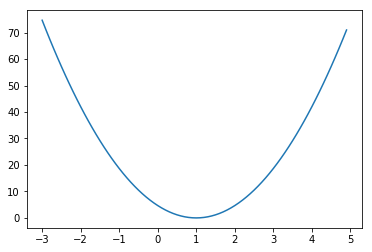

In [1]:
import tensorflow as tf

# http://matplotlib.org/users/installing.html
import matplotlib.pyplot as plt

# x and y data
X = [1,2,3]
Y = [1,2,3]
# W weight and b bias
# W = tf.Variable(tf.random_normal([1]),name='weight')
# b = tf.Variable(tf.random_normal([1]),name='bias')
W = tf.placeholder(tf.float32)

# our hypothsis
hypothsis = X * W 

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothsis - Y))

# launch the graph in a session

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

# Minimize: 

## Gradient Descent using derivative:  $W$ -= learning_rate * derivative
#### learning_rate = 0.1
#### gradient = tf.reduce_mean(($W * X - Y) * X$)
#### descent = W - learning_rate * gradient
#### update = W.assign(descent)

In [2]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

##### Minimize

In [3]:
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)


In [4]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost,feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 2.84063 [ 0.54955339]
1 0.808001 [ 0.75976181]
2 0.229831 [ 0.87187296]
3 0.0653743 [ 0.9316656]
4 0.0185953 [ 0.96355498]
5 0.00528937 [ 0.98056263]
6 0.00150453 [ 0.98963338]
7 0.000427955 [ 0.99447113]
8 0.000121733 [ 0.99705124]
9 3.46266e-05 [ 0.99842733]
10 9.84918e-06 [ 0.99916124]
11 2.80165e-06 [ 0.99955267]
12 7.96917e-07 [ 0.9997614]
13 2.26671e-07 [ 0.99987274]
14 6.45019e-08 [ 0.99993211]
15 1.83863e-08 [ 0.99996376]
16 5.2213e-09 [ 0.99998069]
17 1.4923e-09 [ 0.99998969]
18 4.20982e-10 [ 0.99999452]
19 1.20469e-10 [ 0.99999708]
20 3.47455e-11 [ 0.99999845]


# Minimize: Gradient Descent Magic

In fact, to alternative this, 

learning_rate = 0.1  
gradient = tf.reduce_mean((W * X - Y) * X)  
descent = W - learning_rate * gradient  
update = W.assign(descent)  

we can use
tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [5]:

import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)
# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)


0 5.0
1 1.26667
2 1.01778
3 1.00119
4 1.00008
5 1.00001
6 1.0
7 1.0
8 1.0
9 1.0


## Change the initialization $Weight$
In last part, we can change the line 9  
change the $5.0$ into $-3.0$  
see what will happen

## Optional: compute_gradient and apply_gradient

In [6]:
import tensorflow as tf
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62